In [1]:
import pandas as pd
import re
from difflib import get_close_matches
df = pd.read_csv("data/PRESCRIPTION.csv")

In [2]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",NaN,NaN,NaN,NaN,NaN
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",NaN,NaN,NaN,NaN,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",NaN,NaN,NaN,NaN,NaN
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,NaN,NaN,NaN,NaN,NaN
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,NaN,NaN,NaN
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,NaN,NaN,NaN
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",NaN,NaN,NaN,NaN,NaN
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",NaN,NaN,NaN,NaN,NaN


In [3]:
# Extraire Durée : tout ce qui est après "pendant"
df["Durée"] = df["Prepost"].str.extract(r'pendant\s*(.*)$', expand=False)

# Extraire DOSE et Freq ensemble : tout avant "pendant"
pre_before = df["Prepost"].str.replace(r'\s*pendant.*$', '', regex=True)

# Extraire DOSE : tout avant le premier "par" ou "fois"
df["DOSE"] = pre_before.str.extract(r'^(\d+\s*\w+)', expand=False)

# Extraire Freq : tout le reste après la DOSE
df["Freq"] = pre_before.str.replace(r'^(\d+\s*\w+)\s*', '', regex=True)

In [4]:

def clean_freq(text):
    if pd.isna(text):
        return text
    
    text = str(text).strip()             # enlever espaces début/fin
    
    # Si virgule : garder uniquement après la première virgule
    if "," in text:
        text = text.split(",", 1)[1].strip()
    else:
        text = text.strip()
    
    return text

df["Freq"] = df["Freq"].apply(clean_freq)


In [7]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",NaN,NaN,1 Comprimé,1 fois / jour,30 jour(s)
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",NaN,NaN,3 Capsule,Toutes les 12 heures,30 jour(s)
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",NaN,NaN,1 Comprimé,Toutes les 12 heures,30 jour(s)
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,NaN,NaN,1 comprimé,par jour,1 mois
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,NaN,NaN,2 comprimés,par jour,1 mois
...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,1 comprimé,1 fois par jour(s),28 jour(s)
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,1 comprimé,1 fois par jour(s),28 jour(s)
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",NaN,NaN,1 ampoule,tous les 6 mois,6 mois
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",NaN,NaN,1 comprimé,par jour(s),30 jour(s)


In [23]:
import re
from difflib import get_close_matches
import unicodedata

# ----------------------------------------------------------------
# FONCTION : Normaliser les textes
# ----------------------------------------------------------------
def normaliser_texte(texte):
    """
    Convertit en majuscules ET supprime les accents
    
    """
    if not texte:
        return ""
    # Mettre en majuscules
    texte = str(texte).upper()
    # Supprimer les accents (NFD = décompose les accents, puis on les retire)
    texte = unicodedata.normalize('NFD', texte)
    texte = ''.join(char for char in texte if unicodedata.category(char) != 'Mn')
    return texte


In [24]:

# ----------------------------------------------------------------
# 1. Charger le dictionnaire VIH
# ----------------------------------------------------------------
df_ref = pd.read_excel("data/bdd.xlsx")
print(f"→ {len(df_ref)} médicaments dans le dictionnaire VIH")
print(f"→ {len(df)} lignes à traiter dans df")

# ----------------------------------------------------------------
# 2. Préparation du dictionnaire VIH (AVEC NORMALISATION)
# ----------------------------------------------------------------
df_ref["nom_commercial"] = df_ref["nom_commercial"].fillna("").astype(str)
df_ref["dci"] = df_ref["dci"].fillna("").astype(str)

df_ref_unique = df_ref[df_ref["dci"] != ""].drop_duplicates(subset=["nom_commercial"])
print(f"→ {len(df_ref_unique)} médicaments uniques après filtrage")

# Créer un dictionnaire optimisé : clé = nom_base NORMALISÉ, valeur = dci
dci_dict = {}
for _, row in df_ref_unique.iterrows():
    nom = row["nom_commercial"].strip()
    dci = row["dci"].strip()
    if nom and dci:
        #  CHANGEMENT ICI : utiliser normaliser_texte()
        nom_base = re.split(r'\s+\d|,|\s+\(', nom)[0].strip()
        nom_base_normalise = normaliser_texte(nom_base)  # ← NOUVEAU
        
        if nom_base_normalise not in dci_dict:
            dci_dict[nom_base_normalise] = dci

print(f"→ {len(dci_dict)} noms de base uniques indexés")

# Set des DCI pour recherche rapide (NORMALISÉ AUSSI)
dci_set = set()
for d in df_ref_unique["dci"]:
    if d:
        d_normalise = normaliser_texte(d)  # ← NOUVEAU
        dci_set.add(d_normalise.lower())
        for comp in re.split(r"[\+/]", d):
            comp = comp.strip()
            if comp:
                comp_normalise = normaliser_texte(comp)  # ← NOUVEAU
                dci_set.add(comp_normalise.lower())


→ 15965 médicaments dans le dictionnaire VIH
→ 1048575 lignes à traiter dans df
→ 15661 médicaments uniques après filtrage
→ 9430 noms de base uniques indexés


In [25]:
# ----------------------------------------------------------------
# 3. Fonction de recherche DCI OPTIMISÉE (AVEC NORMALISATION)
# ----------------------------------------------------------------
def chercher_dci_optimise(med_str):
    if not med_str or not str(med_str).strip():
        return None
    
    med_str = str(med_str).strip()
    
    # CHANGEMENT ICI : normaliser avant de chercher
    cle = med_str.split()[0].strip()
    cle_normalise = normaliser_texte(cle)  # ← NOUVEAU
    cle_lower = cle_normalise.lower()
    
    # 1. Recherche directe dans le dictionnaire
    if cle_normalise in dci_dict:
        return dci_dict[cle_normalise]
    
    # 2. Recherche par préfixe
    for nom_base, dci in dci_dict.items():
        if nom_base.startswith(cle_normalise) or cle_normalise.startswith(nom_base):
            return dci
    
    # 3. Matching approximatif sur les clés
    match = get_close_matches(cle_normalise, dci_dict.keys(), n=1, cutoff=0.8)
    if match:
        return dci_dict[match[0]]
    
    # 4. Vérifier si c'est déjà une DCI
    if cle_lower in dci_set:
        for nom_base, dci in dci_dict.items():
            if cle_lower in normaliser_texte(dci).lower():
                return dci
    
    # 5. Matching approximatif dans les DCI
    match = get_close_matches(cle_lower, list(dci_set), n=1, cutoff=0.8)
    if match:
        for nom_base, dci in dci_dict.items():
            if match[0] in normaliser_texte(dci).lower():
                return dci
    
    return None


In [26]:
# ----------------------------------------------------------------
# 4. Traitement des valeurs uniques
# ----------------------------------------------------------------
print("\n" + "="*60)
print("ÉTAPE 1 : Traitement des valeurs uniques de Prelibt")
print("="*60)

valeurs_uniques = df["Prelibt"].dropna().unique()
print(f"→ {len(valeurs_uniques)} valeurs uniques à traiter")

mapping_dci = {}
for i, val in enumerate(valeurs_uniques, 1):
    if i % 1000 == 0:
        print(f"  Progression : {i}/{len(valeurs_uniques)} ({i/len(valeurs_uniques)*100:.1f}%)")
    dci_trouve = chercher_dci_optimise(val)
    mapping_dci[val] = dci_trouve

nb_trouves_unique = sum(1 for v in mapping_dci.values() if v is not None)
print(f"Terminé : {nb_trouves_unique}/{len(valeurs_uniques)} DCI trouvées")


ÉTAPE 1 : Traitement des valeurs uniques de Prelibt
→ 16001 valeurs uniques à traiter
  Progression : 1000/16001 (6.2%)
  Progression : 2000/16001 (12.5%)
  Progression : 3000/16001 (18.7%)
  Progression : 4000/16001 (25.0%)
  Progression : 5000/16001 (31.2%)
  Progression : 6000/16001 (37.5%)
  Progression : 7000/16001 (43.7%)
  Progression : 8000/16001 (50.0%)
  Progression : 9000/16001 (56.2%)
  Progression : 10000/16001 (62.5%)
  Progression : 11000/16001 (68.7%)
  Progression : 12000/16001 (75.0%)
  Progression : 13000/16001 (81.2%)
  Progression : 14000/16001 (87.5%)
  Progression : 15000/16001 (93.7%)
  Progression : 16000/16001 (100.0%)
Terminé : 14424/16001 DCI trouvées


In [27]:
# ----------------------------------------------------------------
# 5. Application du mapping sur tout le DataFrame
# ----------------------------------------------------------------
print("\n" + "="*60)
print("ÉTAPE 2 : Application du mapping sur tout le DataFrame")
print("="*60)

df["DCI"] = df["Prelibt"].map(mapping_dci)

nb_total_trouves = df["DCI"].notna().sum()
nb_total_vides = df["DCI"].isna().sum()

print(f"Normalisation terminée")
print(f"  → Lignes avec DCI : {nb_total_trouves:,} ({nb_total_trouves/len(df)*100:.1f}%)")
print(f"  → Lignes sans DCI : {nb_total_vides:,} ({nb_total_vides/len(df)*100:.1f}%)")



ÉTAPE 2 : Application du mapping sur tout le DataFrame
Normalisation terminée
  → Lignes avec DCI : 1,012,121 (96.5%)
  → Lignes sans DCI : 36,454 (3.5%)


In [29]:
top_meds = df.groupby(["Prelibt", "DCI"]).size().reset_index(name="count").sort_values("count", ascending=False).head(10)
top_meds

,Prelibt,DCI,count
13352,UVEDOSE 100 000UI/2ML AMP BUV 1,CHOLÉCALCIFÉROL,59506
9280,NORVIR 100MG CPR 30,RITONAVIR,40394
13105,TRUVADA 200MG/245MG CPR 30,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),39317
10549,PREZISTA 800MG CPR 30,ÉTHANOLATE DE DARUNAVIR,18731
7098,KIVEXA 600MG/300MG CPR 30,ABACAVIR (SULFATE D'); LAMIVUDINE,18658
6769,ISENTRESS 400MG CPR 60,RALTÉGRAVIR POTASSIQUE,18090
13076,TRIUMEQ 50MG/600MG/300MG CPR 30,DOLUTÉGRAVIR SODIQUE; LAMIVUDINE; SULFATE D'AB...,16534
4923,EVIPLERA 200MG/25MG/245MG CPR 30,EMTRICITABINE; FUMARATE DE TÉNOFOVIR DISOPROXI...,14823
12776,TIVICAY 50MG CPR 30,DOLUTÉGRAVIR SODIQUE,12992
11214,REYATAZ 300MG GELULE 30,ATAZANAVIR (SULFATE D'),11724


In [38]:
import pandas as pd

print("="*60)
print("REMPLISSAGE DE LA COLONNE ATC")
print("="*60)

# ------------------------------------------------------------------
# 1. Charger le dictionnaire VIH
# ------------------------------------------------------------------
df_ref = pd.read_excel("data/bdd.xlsx")

print(f"→ {len(df_ref)} médicaments dans le dictionnaire VIH")
print(f"→ {len(df)} lignes à traiter dans df")

# ------------------------------------------------------------------
# 2. Préparation du dictionnaire DCI -> ATC
# ------------------------------------------------------------------
df_ref["dci"] = df_ref["dci"].fillna("").astype(str)
df_ref["atc"] = df_ref["atc"].fillna("").astype(str)

# Créer un dictionnaire de correspondance DCI -> ATC
dci_to_atc = {}

for _, row in df_ref.iterrows():
    dci = row["dci"].strip()
    atc = row["atc"].strip()
    
    if dci and atc:
        # Normaliser la clé en minuscule pour recherche insensible à la casse
        dci_to_atc[dci.lower()] = atc

print(f"✓ Dictionnaire DCI->ATC chargé : {len(dci_to_atc)} correspondances")

# ------------------------------------------------------------------
# 3. Fonction de recherche ATC
# ------------------------------------------------------------------

def chercher_atc(dci_value):
    if not dci_value or pd.isna(dci_value) or not str(dci_value).strip():
        return None
    
    dci_str = str(dci_value).strip().lower()
    
    # Recherche exacte
    if dci_str in dci_to_atc:
        return dci_to_atc[dci_str]
    
    # Recherche partielle (si le DCI contient plusieurs composants séparés par + ou /)
    # On prend le premier ATC trouvé
    for dci_key, atc_value in dci_to_atc.items():
        if dci_key in dci_str or dci_str in dci_key:
            return atc_value
    
    return None

# ------------------------------------------------------------------
# 4. Appliquer sur le DataFrame df
# ------------------------------------------------------------------

print("\nTraitement en cours...")
df["ATC"] = df["DCI"].apply(chercher_atc)

nb_trouves = df["ATC"].notna().sum()
nb_vides = df["ATC"].isna().sum()

print(f"Remplissage ATC terminé")
print(f"  → Trouvés : {nb_trouves}")
print(f"  → Non trouvés (laissés vides) : {nb_vides}")

print("="*60)


REMPLISSAGE DE LA COLONNE ATC
→ 15965 médicaments dans le dictionnaire VIH
→ 1048575 lignes à traiter dans df
✓ Dictionnaire DCI->ATC chargé : 1718 correspondances

Traitement en cours...
Remplissage ATC terminé
  → Trouvés : 939834
  → Non trouvés (laissés vides) : 108741


In [39]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",SULFAMÉTHOXAZOLE; TRIMÉTHOPRIME,J01EE01,1 Comprimé,1 fois / jour,30 jour(s)
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",LOPINAVIR; RITONAVIR,J05AR10,3 Capsule,Toutes les 12 heures,30 jour(s)
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",LAMIVUDINE; ZIDOVUDINE,J05AR01,1 Comprimé,Toutes les 12 heures,30 jour(s)
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),J05AR03,1 comprimé,par jour,1 mois
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,RALTÉGRAVIR POTASSIQUE,J05AJ01,2 comprimés,par jour,1 mois
...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s)
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s)
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",CHOLÉCALCIFÉROL,A11CC05,1 ampoule,tous les 6 mois,6 mois
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",HYDROGÉNOSULFATE DE CLOPIDOGREL,B01AC04,1 comprimé,par jour(s),30 jour(s)


In [40]:
100 - (df[df['DCI'].isnull()][['Prelibt']].shape[0])*100/df.shape[0]

96.52347233149752

<Axes: >

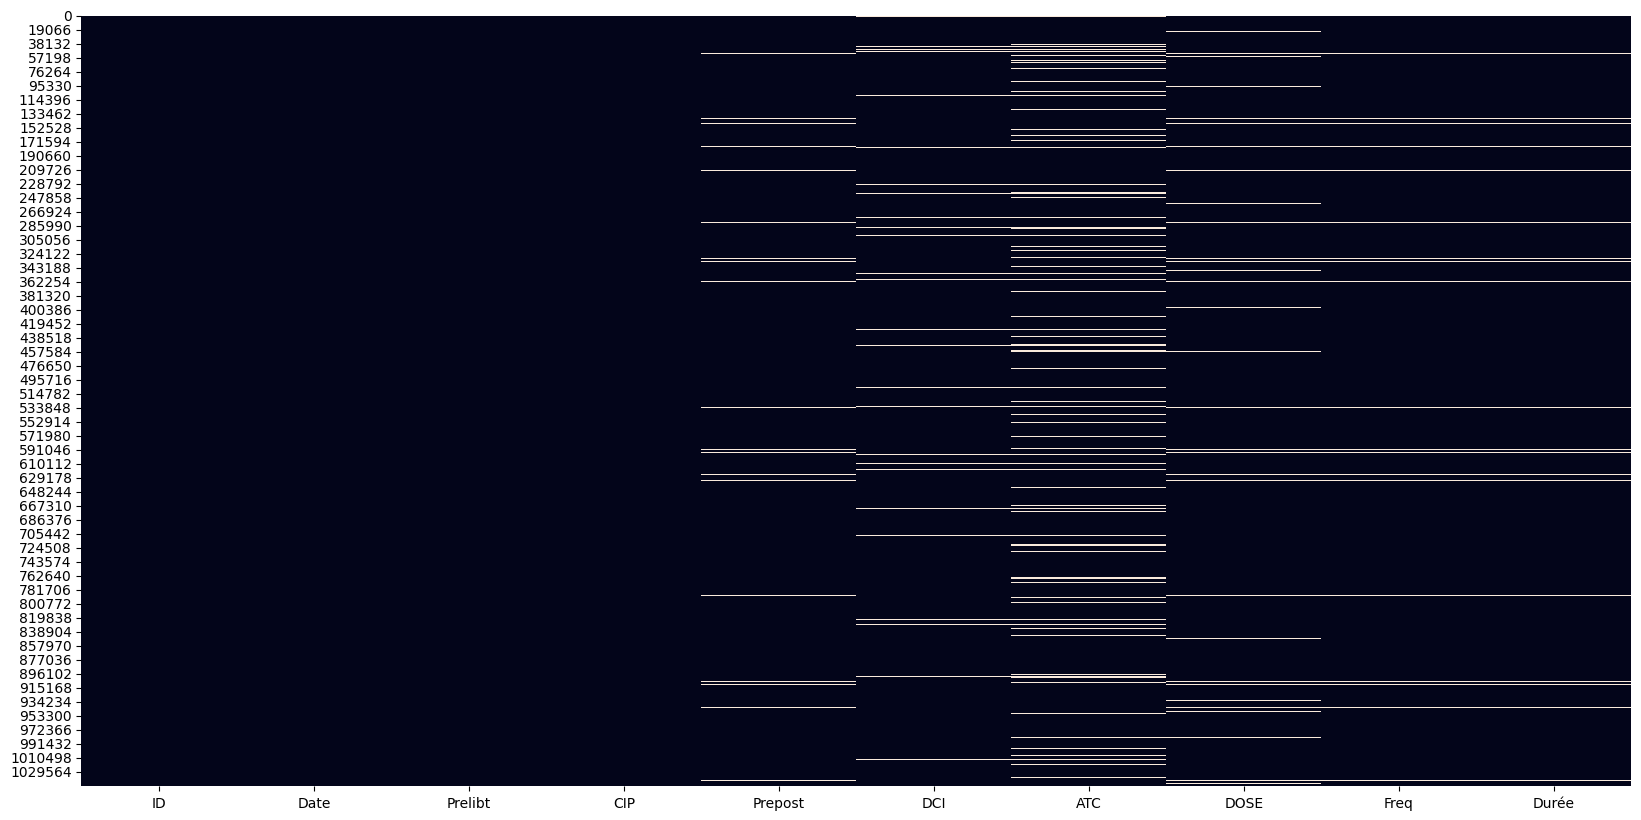

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False)

In [42]:
df.to_excel("data/out/result2.xlsx",index=False)

In [43]:
introuvable = df[df['DCI'].isna()][['Prelibt']]

In [44]:
introuvable["Prelibt"].unique().shape 

(1577,)

In [45]:
introuvable.shape

(36454, 1)

In [46]:
introuvable.value_counts()
introuvable

,Prelibt
32,"BENZATHINE 2,4MUI SDZ PDR+SOL IM 1"
257,DEXERYL CR DERM TUB 250G
258,"SODIUM BICARB 1,4% AGUET 1L 6"
274,DEXERYL CR DERM TUB 250G
275,"SODIUM BICARB 1,4% AGUET 1L 6"
...,...
1048515,DEXERYL CR DERM TUB 250G
1048526,DEXERYL CR DERM TUB 250G
1048538,DEXERYL CR DERM TUB 250G
1048549,DEXERYL CR DERM TUB 250G


In [19]:
introuvable["nom_base"] = introuvable["Prelibt"].str.split().str[0]
introuvable["nom_base"].unique().shape
introuvable[["nom_base"]].value_counts()
introuvable_11 =introuvable[["nom_base"]].value_counts().reset_index()
introuvable_11.columns = ["nom_base", "count"]

In [47]:
introuvable_11

,nom_base,count
0,DEXERYL,14257
1,EMTRICI/TENO,2442
2,CLINUTREN,1940
3,GLYCEROL/VASEL/PARA,1673
4,MASQUE,1613
...,...,...
593,PHARYNDOL,1
594,DOLGIT,1
595,PHOTODERM,1
596,DOCULYSE,1


In [21]:
introuvable_11.to_excel("data/out/INTROUVABLE_pr.xlsx",index=False)